In [1]:
a1 = [1,-1,4]
a2 = [2,9,7]
def convolve(a1,a2):
    m = len(a1)
    n = len(a2)
    matrix = []
    for i in range(m):
        vector_transpose = []
        for j in range(n):
            x = a1[i] * a2[j]
            vector_transpose.append(x)
        matrix.append(vector_transpose)

    
    conv_arr_size = m + n - 1
    conv_arr = [0]*conv_arr_size     
    for i in range(m):

        for j in range(n):
            conv_arr[i + j] += a1[i] * a2[j]
                
        
    return conv_arr,matrix
        
    

In [2]:
res,mat = convolve(a1,a2)

In [3]:
print(res)

[2, 7, 6, 29, 28]


# Point Processing Operations on an Image
# 1. Negation
# 2. Log Transformation
# 3. Power Law Transformation
# 4. Image Flipping

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

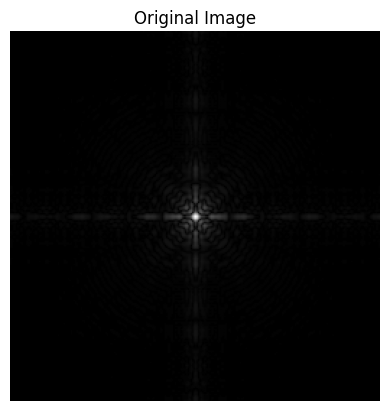

In [ ]:
img1 = cv2.imread("DIP_IMAGES1/TG2.bmp",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img1,cmap = 'gray')
plt.show()

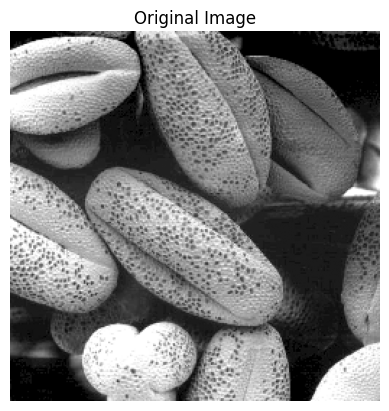

In [9]:
img2 = cv2.imread(r"DIP_IMAGES1/hist8.bmp",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img2,cmap = 'gray')
plt.show()

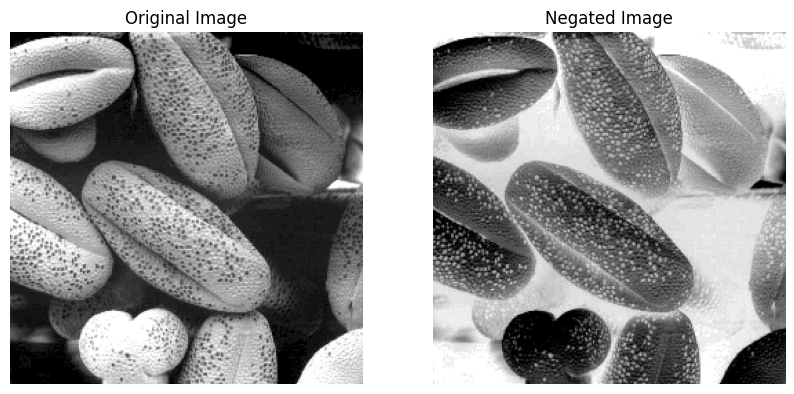

In [12]:
# Negation 
"""Remove the comments from the code below"""
# negated_img = 255 - img2
# plt.title("Negation of the Image")
# plt.axis("off")
# plt.imshow(negated_img,cmap = 'gray')
# plt.show()

# OR If you want to do it using for loop

m,n = img2.shape
result = np.zeros_like(img2,dtype = np.float32)
for i in range(m):
    for j in range(n):
        result[i][j] = 255 - img2[i][j]
result = result.astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img2,cmap = 'gray')

plt.subplot(1,2,2)
plt.title("Negated Image")
plt.axis("off")
plt.imshow(result,cmap = 'gray')
plt.show()

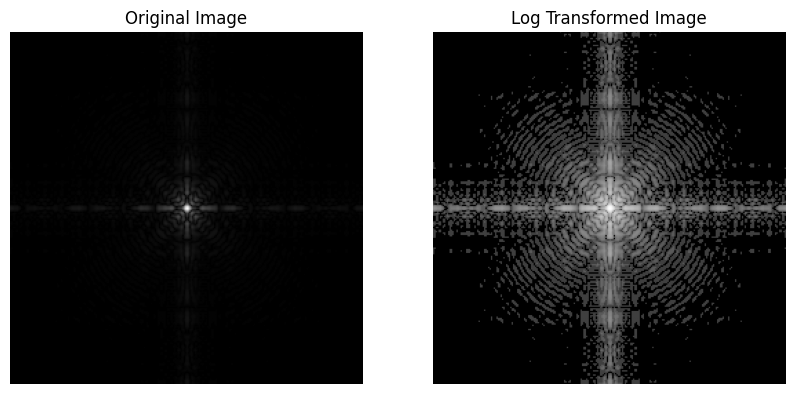

In [13]:
# Log Transformation (s = c * log(1 + r))
# where c = 255 / (log(1 + np.max(img)))


c = 255 / (np.log(1 + np.max(img1)))
"""Remove the comments from the code below"""
# log_transformed_img = c * np.log(1 + img1)
# plt.title("Log Transformed Image")
# plt.axis("off")
# plt.imshow(log_transformed_img,cmap = 'gray')
# plt.show()


# OR If you want to do it using for loop

m,n = img1.shape
result1 = np.zeros_like(img1,dtype = np.float32)
for i in range(m):
    for j in range(n):
        result1[i][j] = c * np.log(1 + img1[i,j])
result1 = result1.astype(np.uint8)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img1,cmap = 'gray')

plt.subplot(1,2,2)
plt.title("Log Transformed Image")
plt.axis("off")
plt.imshow(result1,cmap = 'gray')
plt.show()


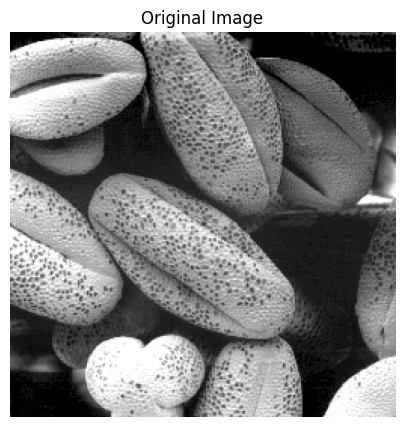

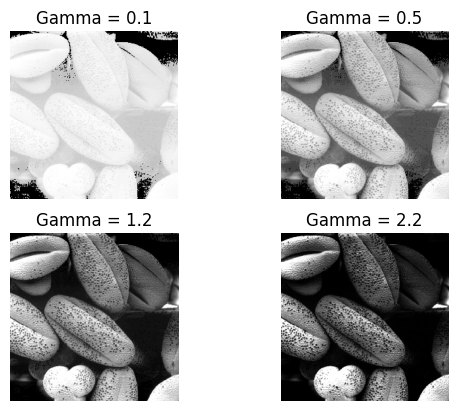

In [19]:
# Power Law Transform
gamma = [0.1,0.5,1.2,2.2]
plt.figure(figsize=(10,5))

plt.title("Original Image")
plt.axis("off")
plt.imshow(img2,cmap = 'gray')
plt.show()
for i in range(len(gamma)):
    power_law_img = np.uint8(255 * (img2 / 255)**gamma[i])
    plt.subplot(2,2,i + 1)
    plt.title(f"Gamma = {gamma[i]}")
    plt.axis("off")
    plt.imshow(power_law_img,cmap = 'gray')
    
plt.show()


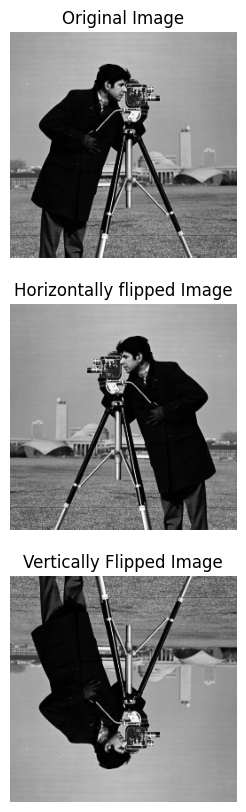

In [24]:
# Image flipping using for loop
img3 = cv2.imread("DIP_IMAGES1/cameraman.bmp",cv2.IMREAD_GRAYSCALE)
horizontal_img = np.zeros_like(img3,dtype=np.float32)
vertical_img = np.zeros_like(img3,dtype=np.float32)
m,n = img3.shape
for i in range(m):
    for j in range(n):
        horizontal_img[i,j] = (img3[i][n - j - 1]).astype(np.uint8)
        vertical_img[i,j] = (img3[m - i - 1][j]).astype(np.uint8)

plt.figure(figsize=(5,10))

plt.subplot(3,1,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img3,cmap = 'gray')

plt.subplot(3,1,2)
plt.title("Horizontally flipped Image")
plt.axis("off")
plt.imshow(horizontal_img,cmap = 'gray')

plt.subplot(3,1,3)
plt.title("Vertically Flipped Image")
plt.axis("off")
plt.imshow(vertical_img ,cmap= 'gray')

plt.show()
